In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
#Make the graphs a bit prettier
plt.style.use('ggplot')

# Chapters 1 + 2

Read the data from the csv file using the following link: 
https://raw.githubusercontent.com/LeonieMei/python-course-2022/main/data/titanic.csv

In [89]:
titanic = pd.read_csv('https://raw.githubusercontent.com/LeonieMei/python-course-2022/main/data/titanic.csv')
#titanic = pd.read_excel('data/titanic.xlsx')

Display the first 10 rows of the data frame.

In [14]:
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Extract the Age column

In [15]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Show the first five rows of the Age column

In [16]:
titanic['Age'][:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Show the last five rows of the Age column

In [17]:
titanic['Age'].tail(5)

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

Extract the Age and the Survived columns

In [18]:
titanic[['Age', 'Survived']]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


What is the most common passenger class?

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Plot the numbers!

<AxesSubplot:>

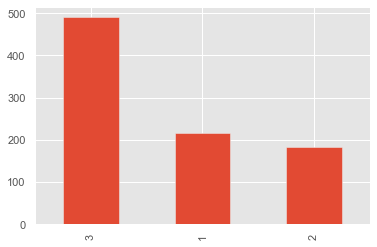

In [20]:
titanic['Pclass'].value_counts().plot(kind='bar')

Where did most people board the ship?

In [118]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Chapter 3

In [66]:
titanic['Survived'] = titanic['Survived'].replace({0: False, 1: True})

Create a boolean array indicating for each row if the person was travelling in first class.

In [73]:
maskFirst = titanic['Pclass'] == 1

Create a new data frame containing only first class passengers.

In [74]:
titanicFirst = titanic[titanic['Pclass'] == 1].copy()
# Or
titanicFirst = titanic[maskFirst].copy()

Create a boolean array indicating for each row if the person travelled in first class and survived.

In [75]:
maskFirstSurvived = (titanic['Pclass'] == 1) & (titanic['Survived'] == True)

In [76]:
maskFirstSurvived

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Length: 891, dtype: bool

Create a new data frame containing only passengers who travelled in first class and who survived.

In [77]:
titanicFirstSurvived = titanic[maskFirstSurvived].copy()

Use the data frame containing only first class passengers to see if more people survived than not.

In [78]:
titanicFirst['Survived'].value_counts()

True     136
False     80
Name: Survived, dtype: int64

Determine the overall number of survivors on the ship.

In [79]:
 titanic['Survived'].value_counts()

False    549
True     342
Name: Survived, dtype: int64

Determine the proportion of first class travellers among those who survived and those who didn't.

In [80]:
 titanicFirst['Survived'].value_counts() / titanic['Survived'].value_counts()

False    0.145719
True     0.397661
Name: Survived, dtype: float64

Plot this.

<AxesSubplot:>

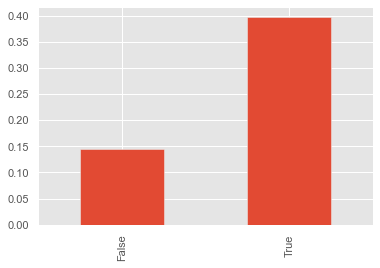

In [81]:
 (titanicFirst['Survived'].value_counts() / titanic['Survived'].value_counts()).plot(kind='bar')

# Chapter 4

Use the groupby and agg functions to determine the mean age of men and women

In [116]:
titanic.groupby('Sex').agg('mean')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [117]:
titanic.groupby('Sex')['Age'].agg('mean')

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

# Chapter 5

Check the length of the original dataframe.

In [83]:
len(titanic)

891

Create a new data frame with all rows that have missing values in any of the columns removed.

In [82]:
titanicNew = titanic.dropna()

Check the length of the new data frame.

In [84]:
len(titanicNew)

183

Drop all rows that have a missing value in the Age column.

In [87]:
titanic.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,False,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Chapter 6

Extract all rows with the string "Anne" in the "Name" column.

In [109]:
titanic[titanic['Name'].str.contains('Anne')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S


# Plotting

<AxesSubplot:xlabel='Sex'>

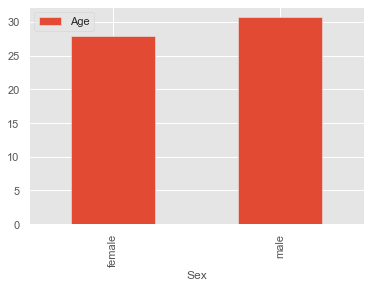

In [6]:
titanic.groupby('Sex').aggregate(np.mean).plot(y='Age', kind='bar')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

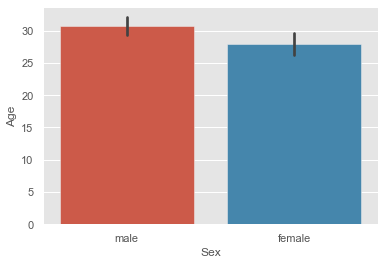

In [7]:
sns.barplot(data=titanic, x='Sex', y='Age')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

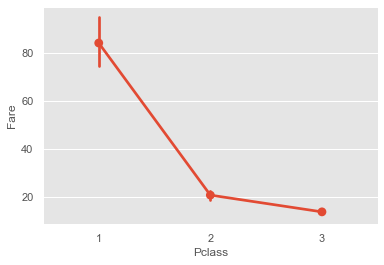

In [93]:
sns.pointplot(data=titanic, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

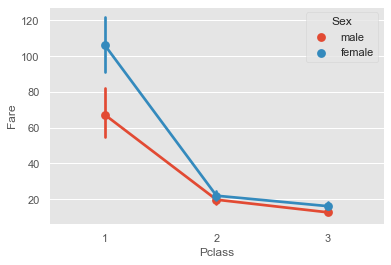

In [94]:
sns.pointplot(data=titanic, x='Pclass', y='Fare', hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

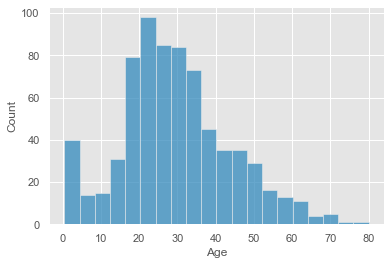

In [97]:
sns.histplot(data=titanic, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

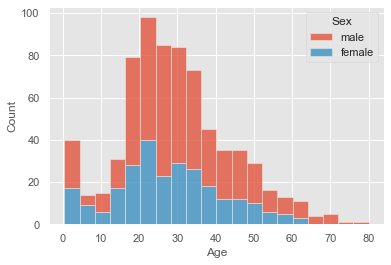

In [100]:
sns.histplot(data=titanic, x='Age', hue='Sex', multiple='stack')

<AxesSubplot:xlabel='Age', ylabel='Count'>

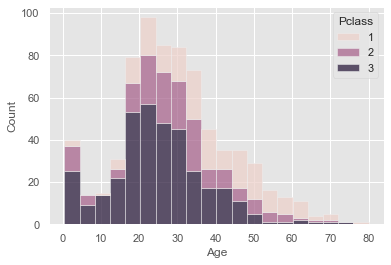

In [101]:
sns.histplot(data=titanic, x='Age', hue='Pclass', multiple='stack')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

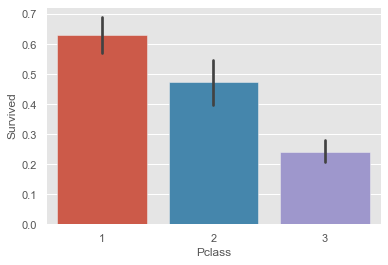

In [106]:
sns.barplot(data=titanic, x='Pclass', y='Survived')bb

<AxesSubplot:xlabel='Parch', ylabel='count'>

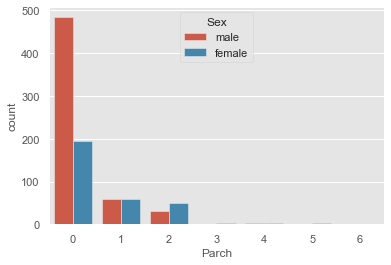

In [113]:
sns.countplot(data=titanic, x='Parch', hue='Sex')